In [70]:
import torch
import glob
import numpy as np
from scipy.ndimage.measurements import label
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [71]:
def base_check_maze(maze: np.ndarray) -> bool:
    """Checks whether the input is a valid maze. Checks the following:
            * there are no islands (i.e. there are no loops).
            * all white pixels are connected.
        Args:
            maze:  The maze to be evaluated
        Returns:
            Whether the maze is valid or not.
        """
    # single connected-component
    labeled_array, num_features = label(maze)

    npmaze = np.array(maze)
    mx, my = npmaze.shape
    if num_features > 1:
        return False
    # no loops
    for i in range(mx - 1):
        for j in range(my - 1):
            if maze[i, j] == 1:
                if maze[i + 1, j] == 1 and maze[i, j + 1] == 1 and maze[i + 1, j + 1] == 1:
                    return False
    maze = maze - 1
    s = [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]
    labeled_array, num_features = label(maze, structure=s)
    for feat in range(1, num_features + 1):
        indexes = np.array(np.where(labeled_array == feat))
        if np.all(indexes[:, :] != 0) and np.all(indexes[0, :] != mx - 1) and np.all(indexes[1, :] != my - 1):
            return False
    return True

def check_maze(maze: np.ndarray) -> bool:
    """Checks whether the input is a valid maze. Checks the following:
        * there are no islands (i.e. there are no loops).
        * all white pixels are connected.
    Args:
        maze:  The maze to be evaluated
    Returns:
        Whether the maze is valid or not.
    """

    # single connected-component
    mx, my = maze.shape
    stack = [(j, i) for i in range(mx) for j in range(my) if maze[i, j] == 1]
    if len(stack) == 0:
        return False
    dx = [0, 1, 0, -1]
    dy = [-1, 0, 1, 0]  # 4 directions to move in the maze
    while len(stack) > 0:
        (cx, cy) = stack[-1]
        nlst = []  # list of available neighbors
        for i in range(4):
            nx = cx + dx[i]
            ny = cy + dy[i]
            if 0 <= nx < mx and 0 <= ny < my:
                if maze[ny][nx] == 0:
                    # of occupied neighbors must be 1
                    ctr = 0
                    for j in range(4):
                        ex = nx + dx[j]
                        ey = ny + dy[j]
                        if 0 <= ex < mx and 0 <= ey < my:
                            if maze[ey][ex] == 1:
                                ctr += 1
                    if ctr == 1:
                        nlst.append(i)
        # if 1 or more neighbors available then randomly select one and move
        if len(nlst) > 0:
            return False
        else:
            stack.pop()
    return base_check_maze(maze)

In [72]:
def get_data(file_path):
    files = glob.glob(file_path)
    files.sort()
    run_stats = []
    for file in files:
        correct = 0
        sample = torch.load(file).numpy()
        for maze in sample:
            correct += int(check_maze(maze))
        run_stats.append(correct)
    return run_stats

In [73]:
print('berndcgan')
berndcgan = get_data('BernoulliDCGAN/30-06-2018/15-35-08/*.sample.tar')
print('heavidcgan')
heavidcgan = get_data('HeavisideDCGAN/16-33-29/*.sample.tar')
print('gumbeldcgan')
gumbeldcgan = get_data('GumbelDCGAN/samples/2018-06-30/12-18-14/*.sample.tar')
print('heavivanil')
heavivanil = get_data('HeavisideVanillaGAN/samples/2018-06-30/08-41-45/*.sample.tar')
print('heavibgan')
heavibgan = get_data('HeavisideBoudnarySeekingGAN/samples/2018-06-30/01-49-33/*.sample.tar')

berndcgan
heavidcgan
gumbeldcgan
heavivanil
heavibgan


In [97]:
data = pd.DataFrame({'Sample number': range(400, 120400, 400),
                    'Bernoulli DCGAN': berndcgan,
                    'Heaviside DCGAN': heavidcgan,
                    'Gumbel DCGAN': gumbeldcgan[:300],
                    'Heaviside vanilla': heavivanil,
                    'Heaviside BGAN': heavibgan})

In [98]:
datamelt = data.melt('Sample number', var_name='GAN type',  value_name='Number correct')


In [99]:
datamelt

,Sample number,GAN type,Number correct
0,400,Bernoulli DCGAN,0
1,800,Bernoulli DCGAN,0
2,1200,Bernoulli DCGAN,0
3,1600,Bernoulli DCGAN,0
4,2000,Bernoulli DCGAN,0
5,2400,Bernoulli DCGAN,0
6,2800,Bernoulli DCGAN,0
7,3200,Bernoulli DCGAN,0
8,3600,Bernoulli DCGAN,0
9,4000,Bernoulli DCGAN,1


In [113]:
sns.set_context("paper")


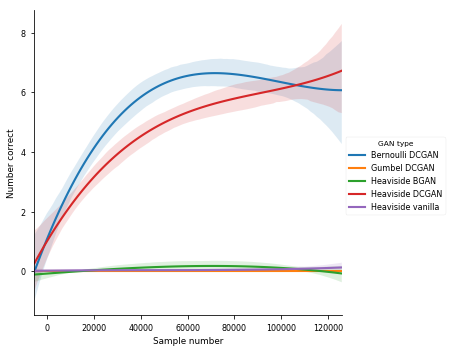

In [114]:
all_trends = sns.lmplot(x='Sample number', y='Number correct', hue='GAN type', data=datamelt, order=3, scatter=False)
all_trends.savefig('all_trends.png')

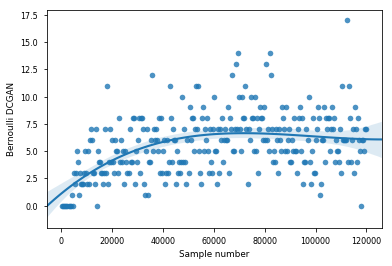

In [115]:
bdcganplot = sns.regplot(x='Sample number', y='Bernoulli DCGAN', data=data, order=3)
bdcganplot.figure.savefig('berndcgan.png')

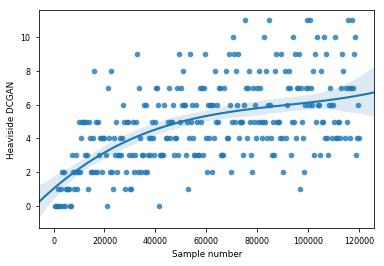

In [116]:
hdcganplot = sns.regplot(x='Sample number', y='Heaviside DCGAN', data=data, order=3)
hdcganplot.figure.savefig('hdcgan.png')

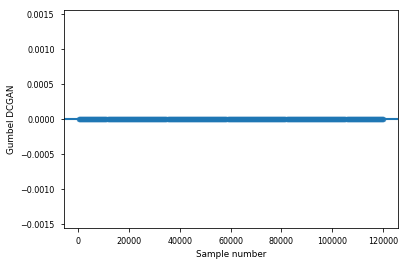

In [117]:
gumdcganplot = sns.regplot(x='Sample number', y='Gumbel DCGAN', data=data, order=3)
gumdcganplot.figure.savefig('gumdcgan.png')

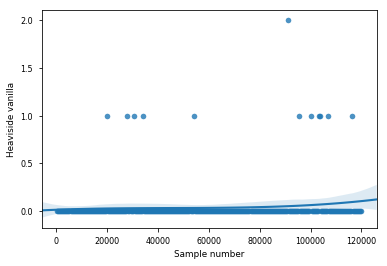

In [118]:
hvanilplot = sns.regplot(x='Sample number', y='Heaviside vanilla', data=data, order=3)
hvanilplot.figure.savefig('hvanil.png')

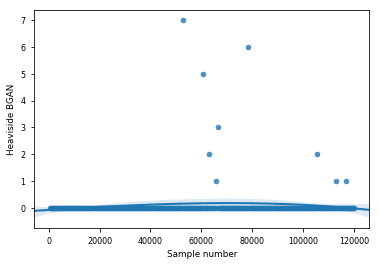

In [119]:
hbganplot = sns.regplot(x='Sample number', y='Heaviside BGAN', data=data, order=3)
hbganplot.figure.savefig('hbgan.png')